In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
import time
movies = pd.read_csv('movie_industry_clean.csv')

In [3]:
# data wrangling
def wrangling(df):
    df = df.drop('Unnamed: 0', axis=1)
    df = df.drop('index', axis=1)
    df.replace(' ', '_', regex=True, inplace = True)
    df.replace('-', '_', regex=True, inplace = True)
    return df

movies = wrangling(movies)

In [4]:
# grouping countries into continents
def continent(s):
    if s['country'] in ['United_States','Mexico', 'Canada','Jamaica']:
        return 'North_America'
    if s['country'] in ['United_Kingdom', 'France', 'Germany', 'Belgium','Spain', 'Norway', 'Iceland', 'West_Germany', 'Ireland', 'Italy', 'Finland', 'Czech_Republic', 'Switzerland', 'Sweden', 'Denmark', 'Netherlands','Federal_Republic_of_Yugoslavia','Yugoslavia', 'Hungary', 'Republic_of_Macedonia', 'Austria','Portugal','Malta']:
        return 'Europe'
    if s['country'] in ['Japan','China','South_Korea', 'Hong_Kong','India','United_Arab_Emirates','Taiwan','Lebanon','Indonesia', 'Iran','Israel','Russia','Thailand']:
        return 'Asia'
    if s['country'] in ['Australia','New_Zealand']:
        return 'Oceania'
    if s['country'] in ['South_Africa', 'Kenya']:
        return 'Africa'
    if s['country'] in ['Brazil', 'Argentina', 'Aruba', 'Chile', 'Panama','Colombia']:
        return 'South_America'
    else:
        return 'NA'

movies['continent'] = movies.apply(continent, axis=1)

In [50]:
movies

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,continent
0,The_Shining,R,Drama,1980,"June_13,_1980_(United_States)",8.4,927000.0,Stanley_Kubrick,Stephen_King,Jack_Nicholson,United_Kingdom,19000000.0,46998772.0,Warner_Bros.,146.0,Europe
1,The_Blue_Lagoon,R,Adventure,1980,"July_2,_1980_(United_States)",5.8,65000.0,Randal_Kleiser,Henry_De_Vere_Stacpoole,Brooke_Shields,United_States,4500000.0,58853106.0,Columbia_Pictures,104.0,North_America
2,Star_Wars:_Episode_V___The_Empire_Strikes_Back,PG,Action,1980,"June_20,_1980_(United_States)",8.7,1200000.0,Irvin_Kershner,Leigh_Brackett,Mark_Hamill,United_States,18000000.0,538375067.0,Lucasfilm,124.0,North_America
3,Airplane!,PG,Comedy,1980,"July_2,_1980_(United_States)",7.7,221000.0,Jim_Abrahams,Jim_Abrahams,Robert_Hays,United_States,3500000.0,83453539.0,Paramount_Pictures,88.0,North_America
4,Caddyshack,R,Comedy,1980,"July_25,_1980_(United_States)",7.3,108000.0,Harold_Ramis,Brian_Doyle_Murray,Chevy_Chase,United_States,6000000.0,39846344.0,Orion_Pictures,98.0,North_America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,Bad_Boys_for_Life,R,Action,2020,"January_17,_2020_(United_States)",6.6,140000.0,Adil_El_Arbi,Peter_Craig,Will_Smith,United_States,90000000.0,426505244.0,Columbia_Pictures,124.0,North_America
5417,Sonic_the_Hedgehog,PG,Action,2020,"February_14,_2020_(United_States)",6.5,102000.0,Jeff_Fowler,Pat_Casey,Ben_Schwartz,United_States,85000000.0,319715683.0,Paramount_Pictures,99.0,North_America
5418,Dolittle,PG,Adventure,2020,"January_17,_2020_(United_States)",5.6,53000.0,Stephen_Gaghan,Stephen_Gaghan,Robert_Downey_Jr.,United_States,175000000.0,245487753.0,Universal_Pictures,101.0,North_America
5419,The_Call_of_the_Wild,PG,Adventure,2020,"February_21,_2020_(United_States)",6.8,42000.0,Chris_Sanders,Michael_Green,Harrison_Ford,Canada,135000000.0,111105497.0,20th_Century_Studios,100.0,North_America


In [51]:
movies.describe()

,year,score,votes,budget,gross,runtime
count,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,2001.661317,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,10.540908,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


In [5]:
# split into training & test
np.random.seed(2)
train = movies.sample(round(movies.shape[0]*0.8)) # 80%
test = movies.drop(train.index)

## INITIAL EDA (incomplete, can be built off of)

### MODEL WITHOUT TRANFORMATIONS

In [7]:
# the start of a model by hand - NO INTERACTIONS/TRANSFORMATIONS
ols_object = smf.ols(formula = 'gross~budget+genre+rating+votes+continent+runtime+score+year', data = train)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     272.6
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:15:00   Log-Likelihood:                -86289.
No. Observations:                4337   AIC:                         1.726e+05
Df Residuals:                    4303   BIC:                         1.729e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -5.257e+08   3.63e+08     -1.448      0.148   -1.24e+09    1.86e+08
genre[T.Adventure]          6.217e+06   7.74e+06      0.803      0.422   -8.97e+06    2.14e+07
genre[T.Animation]          6.414e+07   1.01e+07      6.336      0.000    4.43e+07     8.4e+07
genre[T.Biography]         -1.005e+07   8.08e+06     -1.243      0.214   -2.59e+07    5.79e+06
genre[T.Comedy]             1.418e+07   4.74e+06      2.992      0.003    4.89e+06    2.35e+07
genre[T.Crime]             -2.856e+06   7.08e+06     -0.404      0.687   -1.67e+07     1.1e+07
genre[T.Drama]              1.931e+06   5.63e+06      0.343      0.731    -9.1e+06     1.3e+07
genre[T.Family]             4.694e+08   6.16e+07      7.621      0.000    3.49e+08     5.9e+08
genre[T.Fantasy]             2.11e+07   2.01e+07      1.050      0.294   -1.83e+07    6.05e+07
genre[T.Horror]             4.058e+07   8.46e+06      4.797      0.000     2.4e+07    5.72e+07
genre[T.Mystery]            1.333e+07   3.09e+07      0.431      0.666   -4.73e+07    7.39e+07
genre[T.Romance]           -1.125e+07   5.34e+07     -0.211      0.833   -1.16e+08    9.34e+07
genre[T.Sci_Fi]            -2.413e+07   4.35e+07     -0.554      0.579   -1.09e+08    6.12e+07
genre[T.Thriller]           3.862e+07   4.36e+07      0.887      0.375   -4.68e+07    1.24e+08
genre[T.Western]           -3.608e+06   1.06e+08     -0.034      0.973   -2.12e+08    2.05e+08
rating[T.G]                -7.332e+07   1.07e+08     -0.683      0.495   -2.84e+08    1.37e+08
rating[T.NC_17]            -7.814e+07   1.12e+08     -0.698      0.485   -2.98e+08    1.41e+08
rating[T.Not_Rated]        -5.937e+07   1.08e+08     -0.548      0.584   -2.72e+08    1.53e+08
rating[T.PG]               -5.853e+07   1.07e+08     -0.549      0.583   -2.68e+08    1.51e+08
rating[T.PG_13]            -6.984e+07   1.07e+08     -0.654      0.513   -2.79e+08    1.39e+08
rating[T.R]                -8.442e+07   1.07e+08     -0.791      0.429   -2.94e+08    1.25e+08
rating[T.TV_MA]            -9.248e+07   1.51e+08     -0.613      0.540   -3.88e+08    2.03e+08
rating[T.Unrated]          -5.807e+07   1.11e+08     -0.523      0.601   -2.76e+08     1.6e+08
rating[T.X]                -1.215e+08   1.51e+08     -0.805      0.421   -4.17e+08    1.74e+08
continent[T.Asia]           3.385e+07   6.25e+07      0.541      0.588   -8.87e+07    1.56e+08
continent[T.Europe]         1.099e+07   6.15e+07      0.179      0.858    -1.1e+08    1.32e+08
continent[T.North_America]  2.638e+07   6.15e+07      0.429      0.668   -9.41e+07    1.47e+08
continent[T.Oceania]        3.551e+07   6.32e+07      0.562      0.574   -8.83e+07    1.59e+08
continent[T.South_America]  2.036e+07   7.52e+07      0.271      0.787   -1.27e+08    1.68e+08
budget                         2.5002      

### TAKEAWAYS
- runtime & year do not seem to be significant
- only some of the genres seems to be significant - more evidence that they are signficant in backwards stepwise selection
- rating does not seem to be signficant

### LINEARITY ASSUMPTIONS (with model with no interactions/transformations)

Text(0, 0.5, 'Residuals')

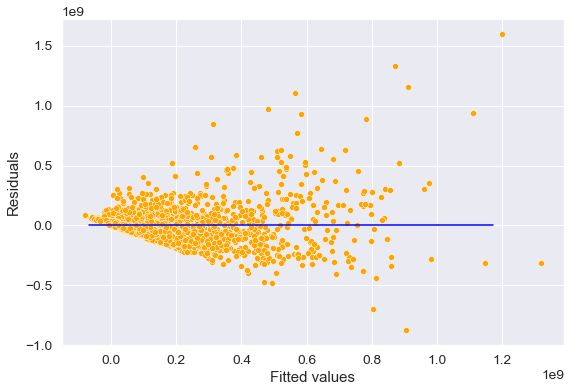

In [54]:
#Plotting residuals vs fitted values
pred_gross = model.predict(test)
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
sns.lineplot(x = [pred_gross.min(),pred_gross.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

### MODEL WITH TRANSFORMATIONS/INTERACTIONS

In [8]:
# the start of a model by hand
ols_object = smf.ols(formula = 'gross~budget*genre+score*votes+rating+I(budget**2)+I(votes**2)+I(score*votes**2)', data = train)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     607.3
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:15:09   Log-Likelihood:                -85915.
No. Observations:                4337   AIC:                         1.719e+05
Df Residuals:                    4317   BIC:                         1.720e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0161      0.001     12.220      0.000       0.013       0.019
genre[T.Adventure]            0.0170      0.001     12.173      0.000       0.014       0.020
genre[T.Animation]           -0.0007   5.91e-05    -12.203      0.000      -0.001      -0.001
genre[T.Biography]            0.0005   3.94e-05     12.237      0.000       0.000       0.001
genre[T.Comedy]               0.0045      0.000     12.219      0.000       0.004       0.005
genre[T.Crime]                0.0009   7.26e-05     12.224      0.000       0.001       0.001
genre[T.Drama]                0.0031      0.000     12.226      0.000       0.003       0.004
genre[T.Family]            1.154e-05   9.38e-07     12.305      0.000     9.7e-06    1.34e-05
genre[T.Fantasy]              0.0004   3.23e-05     12.208      0.000       0.000       0.000
genre[T.Horror]               0.0038      0.000     12.210      0.000       0.003       0.004
genre[T.Mystery]          -4.692e-05   3.85e-06    -12.173      0.000   -5.45e-05   -3.94e-05
genre[T.Romance]          -7.519e-06   6.27e-07    -11.991      0.000   -8.75e-06   -6.29e-06
genre[T.Sci_Fi]            1.733e-05   1.42e-06     12.191      0.000    1.45e-05    2.01e-05
genre[T.Thriller]          1.489e-05   1.23e-06     12.144      0.000    1.25e-05    1.73e-05
genre[T.Western]            4.77e-08   8.04e-07      0.059      0.953   -1.53e-06    1.62e-06
rating[T.G]                  -0.0008   6.47e-05    -12.203      0.000      -0.001      -0.001
rating[T.NC_17]               0.0002   1.44e-05     12.213      0.000       0.000       0.000
rating[T.Not_Rated]           0.0002   1.55e-05     12.223      0.000       0.000       0.000
rating[T.PG]                 -0.0022      0.000    -12.203      0.000      -0.003      -0.002
rating[T.PG_13]               0.0080      0.001     12.209      0.000       0.007       0.009
rating[T.R]                   0.0107      0.001     12.223      0.000       0.009       0.012
rating[T.TV_MA]            1.483e-06    1.2e-07     12.367      0.000    1.25e-06    1.72e-06
rating[T.Unrated]          3.355e-05   2.75e-06     12.219      0.000    2.82e-05    3.89e-05
rating[T.X]               -1.518e-05   1.24e-06    -12.196      0.000   -1.76e-05   -1.27e-05
budget                        0.0206      0.101      0.203      0.839      -0.178       0.220
budget:genre[T.Adventure]     0.4631      0.099      4.677      0.000       0.269       0.657
budget:genre[T.Animation]     1.2829      0.082     15.670      0.000       1.122       1.443
budget:genre[T.Biography]    -0.3942      0.194     -2.037      0.042      -0.774      -0.015
budget:genre[T.Comedy]        0.2330      0.105      2.218      0.027       0.027       0.439
budget:genre[T.Crime]        -0.3452      0.189     -1.826      0.068      

In [16]:
# sqrt of the mode
ols_object = smf.ols(formula = 'np.sqrt(gross)~budget*genre+score*votes+rating+I(budget**2)+I(votes**2)+I(score*votes**2)', data = train)
model_sqrt = ols_object.fit()
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.sqrt(gross)   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     649.8
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:45:35   Log-Likelihood:                -41271.
No. Observations:                4337   AIC:                         8.258e+04
Df Residuals:                    4317   BIC:                         8.271e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  1.248e-06   4.45e-08     28.058      0.000    1.16e-06    1.34e-06
genre[T.Adventure]         1.318e-06   4.72e-08     27.931      0.000    1.23e-06    1.41e-06
genre[T.Animation]        -5.606e-08      2e-09    -28.014      0.000      -6e-08   -5.21e-08
genre[T.Biography]         3.744e-08   1.33e-09     28.107      0.000    3.48e-08    4.01e-08
genre[T.Comedy]            3.465e-07   1.24e-08     28.057      0.000    3.22e-07    3.71e-07
genre[T.Crime]               6.9e-08   2.46e-09     28.069      0.000    6.42e-08    7.38e-08
genre[T.Drama]             2.447e-07   8.72e-09     28.075      0.000    2.28e-07    2.62e-07
genre[T.Family]            8.949e-10   3.17e-11     28.200      0.000    8.33e-10    9.57e-10
genre[T.Fantasy]            3.06e-08   1.09e-09     28.027      0.000    2.85e-08    3.27e-08
genre[T.Horror]            2.933e-07   1.05e-08     28.031      0.000    2.73e-07    3.14e-07
genre[T.Mystery]          -3.644e-09    1.3e-10    -27.935      0.000    -3.9e-09   -3.39e-09
genre[T.Romance]          -5.829e-10   2.12e-11    -27.464      0.000   -6.25e-10   -5.41e-10
genre[T.Sci_Fi]            1.347e-09   4.81e-11     28.010      0.000    1.25e-09    1.44e-09
genre[T.Thriller]          1.162e-09   4.15e-11     27.986      0.000    1.08e-09    1.24e-09
genre[T.Western]           5.704e-12   2.72e-11      0.210      0.834   -4.76e-11    5.91e-11
rating[T.G]               -6.135e-08   2.19e-09    -28.012      0.000   -6.56e-08   -5.71e-08
rating[T.NC_17]            1.371e-08   4.89e-10     28.041      0.000    1.28e-08    1.47e-08
rating[T.Not_Rated]        1.475e-08   5.26e-10     28.068      0.000    1.37e-08    1.58e-08
rating[T.PG]              -1.744e-07   6.23e-09    -28.012      0.000   -1.87e-07   -1.62e-07
rating[T.PG_13]             6.24e-07   2.23e-08     28.029      0.000     5.8e-07    6.68e-07
rating[T.R]                8.298e-07   2.96e-08     28.067      0.000    7.72e-07    8.88e-07
rating[T.TV_MA]            1.155e-10   4.06e-12     28.456      0.000    1.08e-10    1.23e-10
rating[T.Unrated]          2.607e-09   9.29e-11     28.056      0.000    2.42e-09    2.79e-09
rating[T.X]               -1.179e-09   4.21e-11    -27.993      0.000   -1.26e-09    -1.1e-09
budget                     9.753e-05   3.43e-06     28.396      0.000    9.08e-05       0.000
budget:genre[T.Adventure]  1.521e-05   3.35e-06      4.537      0.000    8.64e-06    2.18e-05
budget:genre[T.Animation]  3.741e-05   2.77e-06     13.500      0.000     3.2e-05    4.28e-05
budget:genre[T.Biography] -3.525e-06   6.55e-06     -0.538      0.591   -1.64e-05    9.32e-06
budget:genre[T.Comedy]     2.389e-05   3.56e-06      6.720      0.000    1.69e-05    3.09e-05
budget:genre[T.Crime]     -5.961e-06    6.4e-06     -0.932      0.352   -1.

In [17]:
# RSE on training data
print(np.sqrt(model_sqrt.mse_resid))
# RMSE
pred_sqrt_gross = model_sqrt.predict(test)
print(np.sqrt(((test.gross - pred_sqrt_gross**2)**2).mean()))

3292.1776428765625
116335637.3917265


#### The model without the np.sqrt(gross) (just 'gross') seems to be better for prediction, but the one with the np.sqrt(gross) seems to be better for inference.

### LINEARITY ASSUMPTIONS (with model with interactions/transformations)

Text(0, 0.5, 'Residuals')

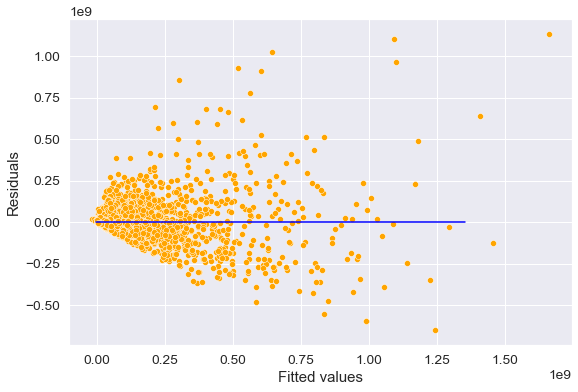

In [42]:
#Plotting residuals vs fitted values
pred_gross = model.predict(test)
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
sns.lineplot(x = [pred_gross.min(),pred_gross.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

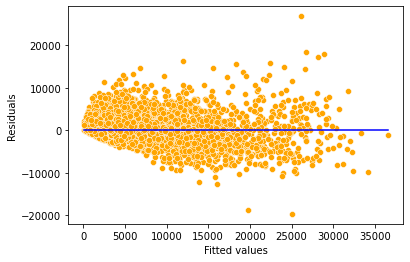

In [15]:
# log model
sns.scatterplot(x = (model_sqrt.fittedvalues), y=(model_sqrt.resid),color = 'orange')
sns.lineplot(x = [model_sqrt.fittedvalues.min(),model_sqrt.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

### Visualizations to help make the mode:

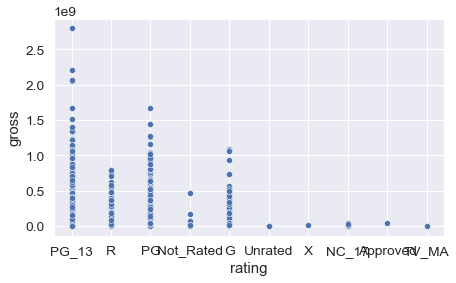

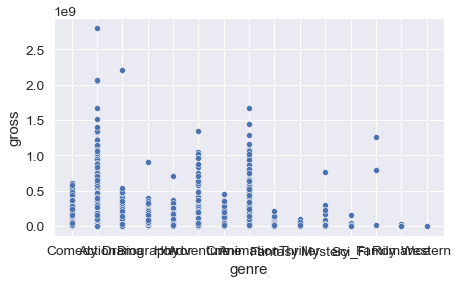

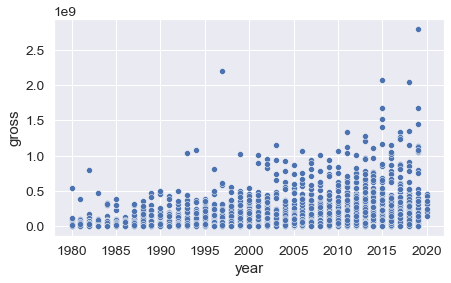

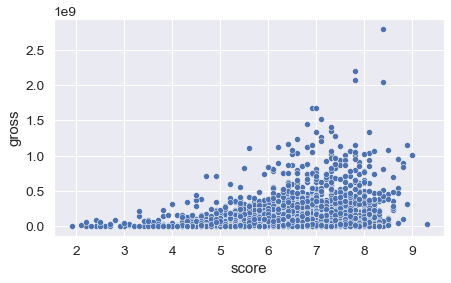

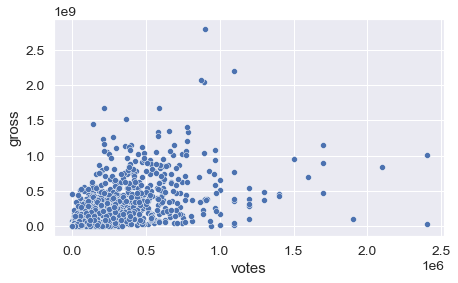

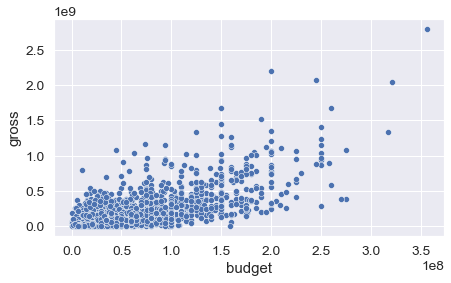

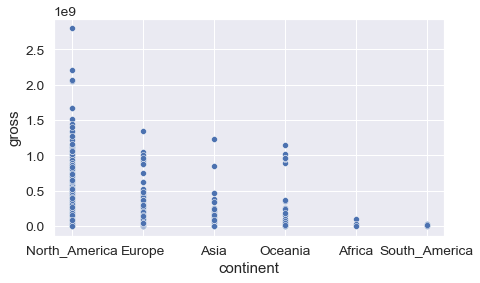

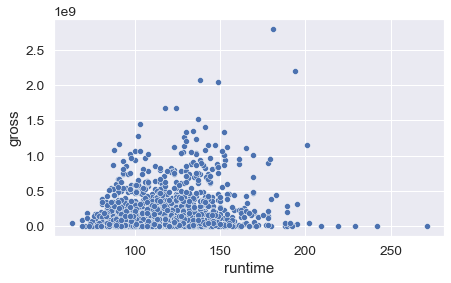

In [38]:
cols = ['rating','genre','year','score','votes','budget','continent','runtime']
for col in cols:
    plt.rcParams["figure.figsize"] = (7,4)
    sns.set(font_scale=1.25)
    sns.scatterplot(x = col, y = 'gross', data = train)
    plt.show()

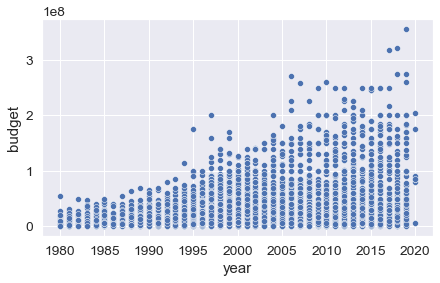

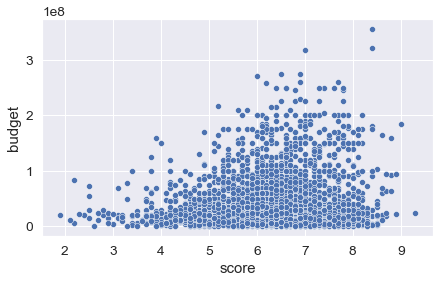

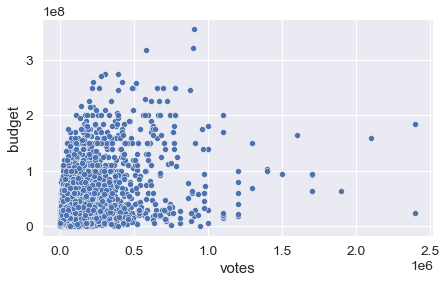

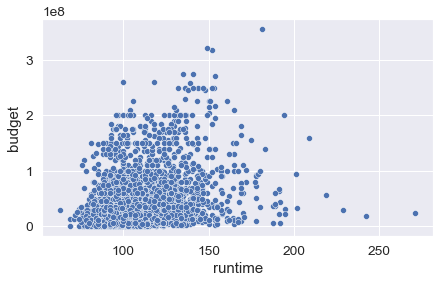

In [39]:
cols = ['year','score','votes','runtime']
for col in cols:
    plt.rcParams["figure.figsize"] = (7,4)
    sns.set(font_scale=1.25)
    sns.scatterplot(x = col, y = 'budget', data = train)
    plt.show()

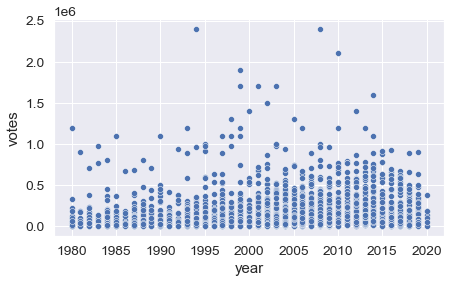

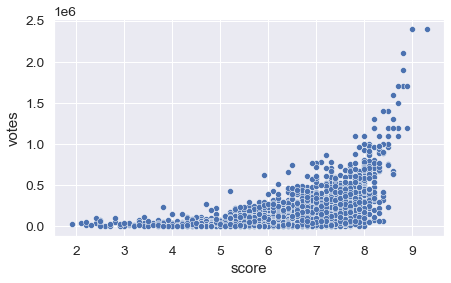

In [40]:
cols = ['year','score']
for col in cols:
    plt.rcParams["figure.figsize"] = (7,4)
    sns.set(font_scale=1.25)
    sns.scatterplot(x = col, y = 'votes', data = train)
    plt.show()

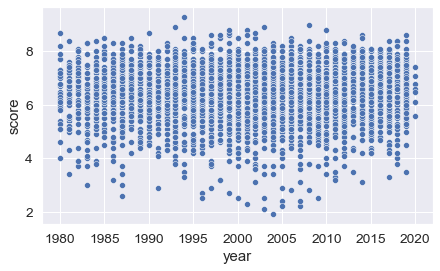

In [41]:
cols = ['year']
for col in cols:
    plt.rcParams["figure.figsize"] = (7,4)
    sns.set(font_scale=1.25)
    sns.scatterplot(x = col, y = 'score', data = train)
    plt.show()

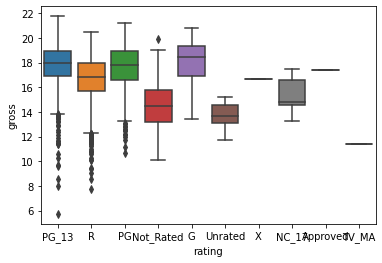

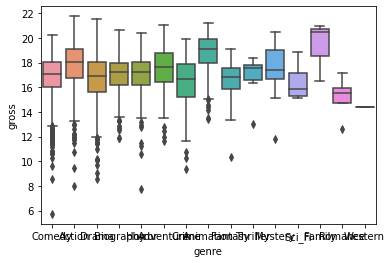

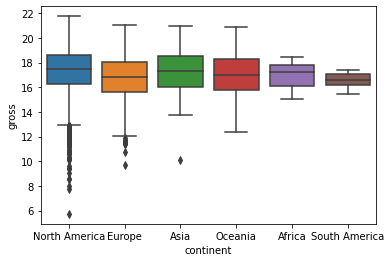

In [34]:
# visualizations of categorical variables vs gross
for col in ['rating','genre','continent']:
    sns.boxplot(x = col, y = np.log(train.gross), data = train)
    plt.show()

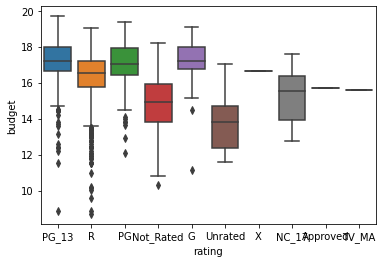

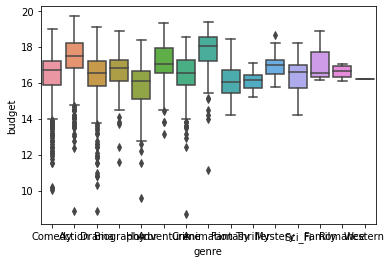

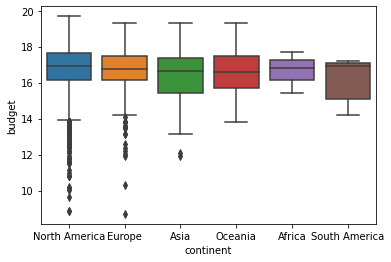

In [33]:
# visualizations of categorical variables vs gross
for col in ['rating','genre','continent']:
    sns.boxplot(x = col, y = np.log(train.budget), data = train)
    plt.show()

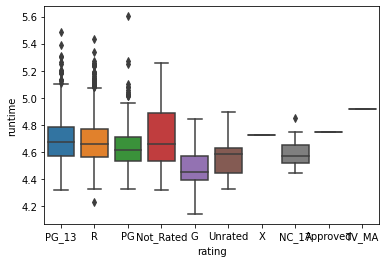

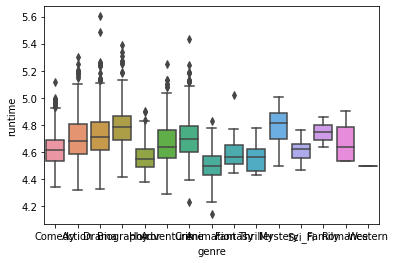

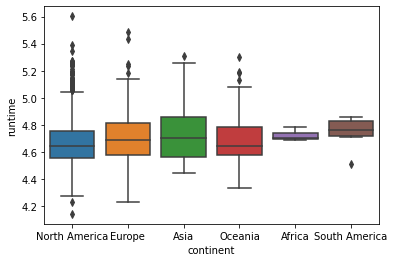

In [32]:
# visualizations of categorical variables vs gross
for col in ['rating','genre','continent']:
    sns.boxplot(x = col, y = np.log(train.runtime), data = train)
    plt.show()

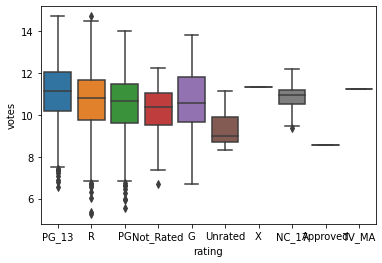

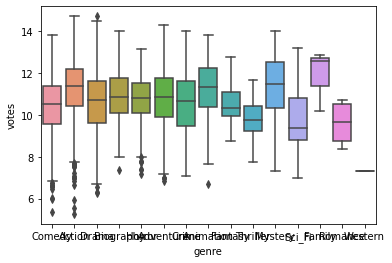

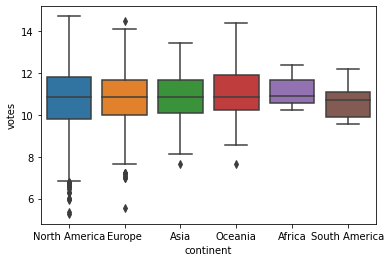

In [31]:
# visualizations of categorical variables vs gross
for col in ['rating','genre','continent']:
    sns.boxplot(x = col, y = np.log(train.votes), data = train)
    plt.show()

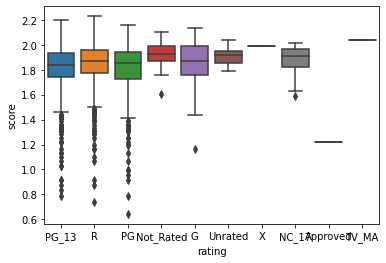

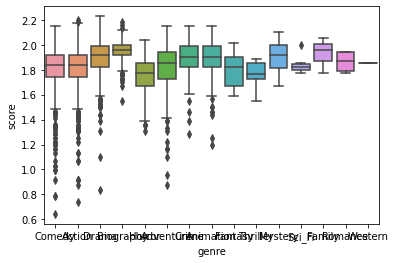

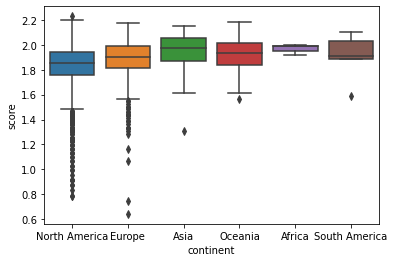

In [30]:
# visualizations of categorical variables vs gross
for col in ['rating','genre','continent']:
    sns.boxplot(x = col, y = np.log(train.score), data = train)
    plt.show()

In [32]:
train.corrwith(train.gross).sort_values(ascending = False)

gross         1.000000
budget        0.744515
votes         0.622671
year          0.274300
runtime       0.272977
Unnamed: 0    0.265950
index         0.264100
score         0.225487
dtype: float64

In [33]:
train.corrwith(train.budget).sort_values(ascending = False)

budget        1.000000
gross         0.744515
votes         0.451332
year          0.327472
runtime       0.319605
index         0.318929
Unnamed: 0    0.314499
score         0.070302
dtype: float64

In [34]:
train.corrwith(train.votes).sort_values(ascending = False)

votes         1.000000
gross         0.622671
score         0.475330
budget        0.451332
runtime       0.354981
year          0.210504
index         0.197007
Unnamed: 0    0.195359
dtype: float64

## MULTICOLLINEARITY CHECK

In [30]:
# doing VIF to see if there is multicollinearity
X = train[['year','score','votes','budget','runtime']]
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

   feature           VIF
0    const  40965.310821
1     year      1.130068
2    score      1.512960
3    votes      1.685885
4   budget      1.499190
5  runtime      1.347823


In [5]:
# There is very little collinearity.

Text(0.5, 1.0, 'Heatmap of Predictors')

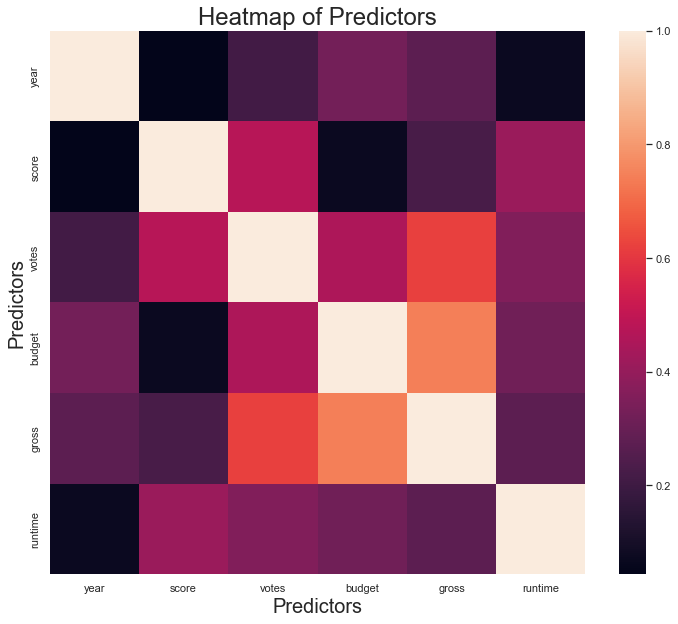

In [28]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(train.corr())
plt.xlabel('Predictors', fontsize=20)
plt.ylabel('Predictors',fontsize=20)
plt.title('Heatmap of Predictors', fontsize=24)

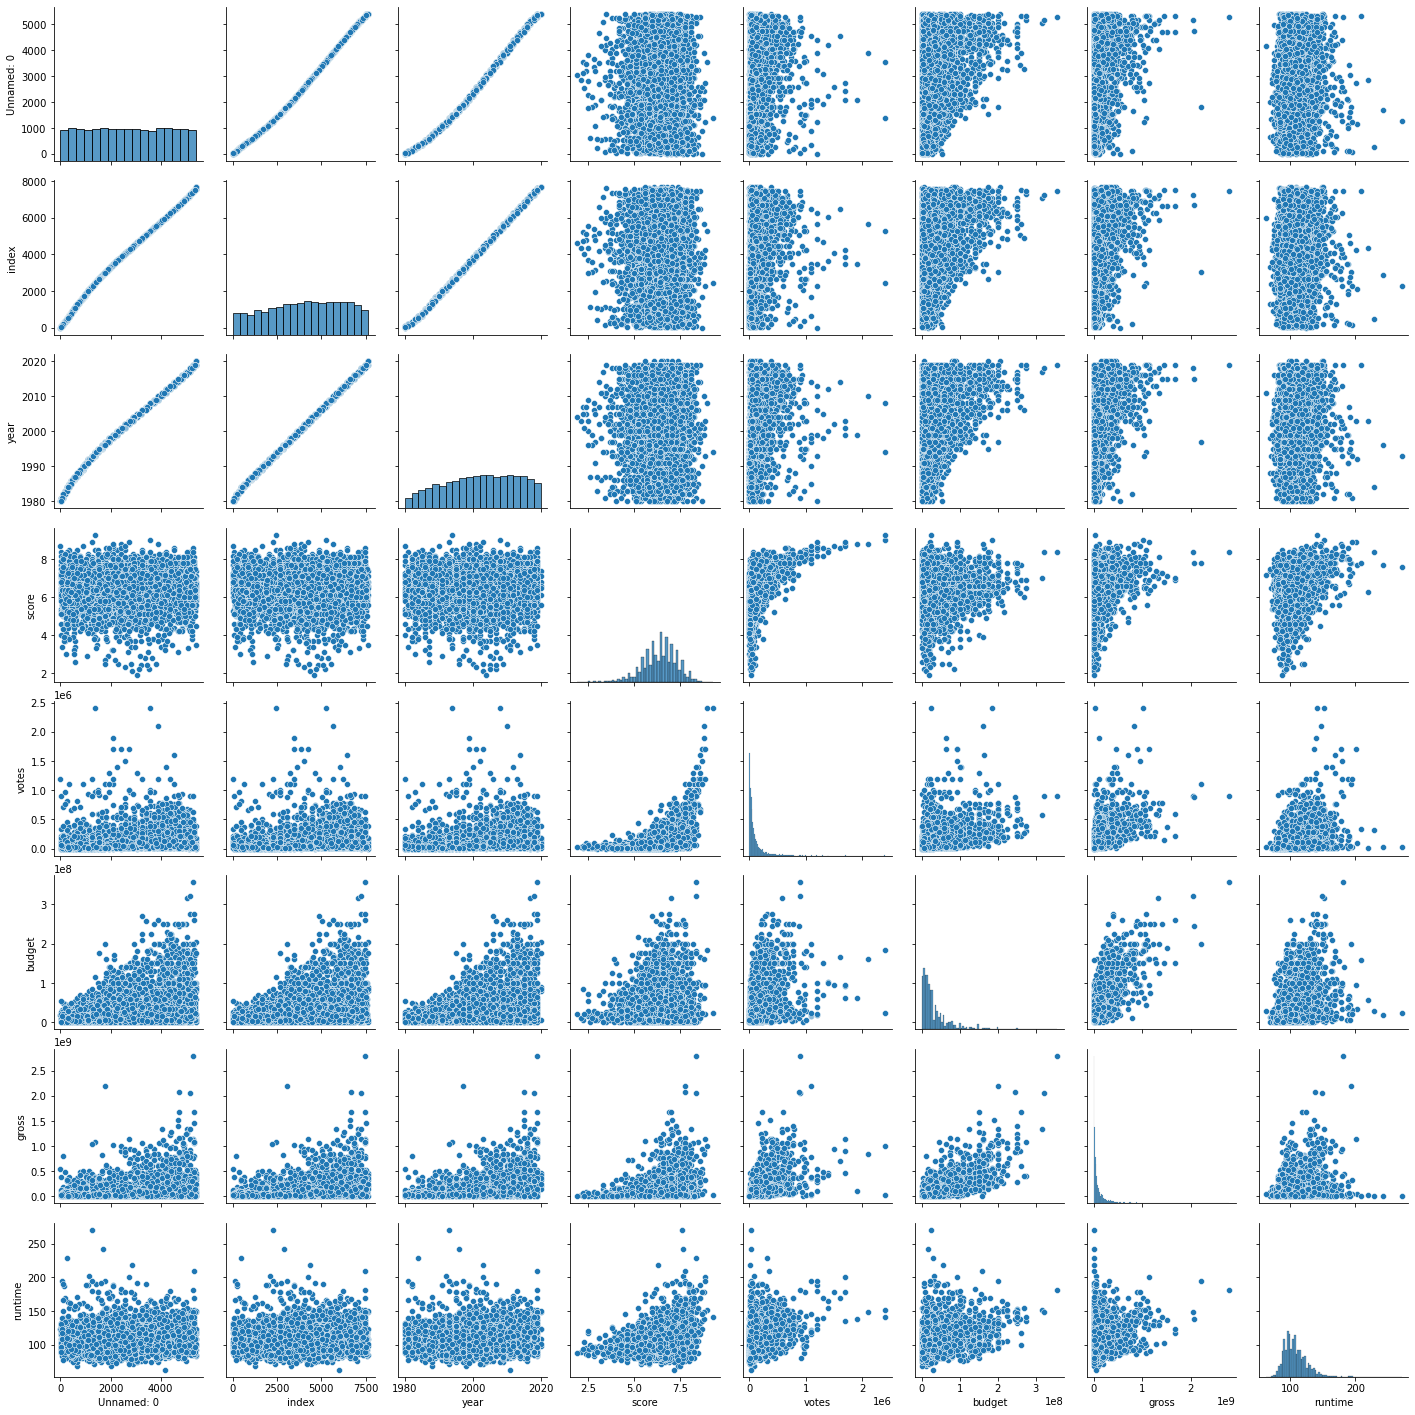

In [4]:
sns.pairplot(train)

# Pairplot indicates curvature in gross - resembles parabaloid 

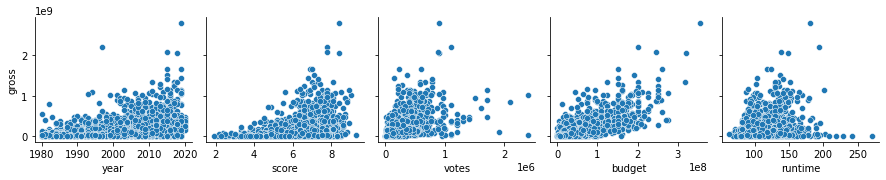

In [6]:
# Pairplot for gross

sns.pairplot(train, x_vars=['year', 'score', 'votes', 'budget', 'runtime'], y_vars=['gross'])

In [13]:
def dummies_for_countries(df):
    rating_dummy = pd.get_dummies(df['rating'])
    df = pd.concat([df, rating_dummy], axis=1)
    df = df.drop('rating', axis=1)
    genre_dummy = pd.get_dummies(df['genre'])
    df = pd.concat([df, genre_dummy], axis=1)
    df = df.drop('genre', axis=1)
    country_dummy = pd.get_dummies(df['country'])
    df = pd.concat([df, country_dummy], axis=1)
    df = df.drop('country', axis=1)
    return df

train = dummies_for_countries(train)
test = dummies_for_countries(test)

In [15]:
#Creating a set of predictors from which we need to find the best subset of predictors
X = train[['year','score','votes','budget','runtime','United_States', 'United_Kingdom', 'France', 'Germany', 'Belgium',
       'Spain', 'Japan', 'Australia', 'New_Zealand', 'China', 'Canada',
       'Austria', 'Norway', 'Iceland', 'West_Germany', 'Mexico',
       'Ireland', 'Italy', 'South_Korea', 'Hong_Kong', 'India',
       'United_Arab_Emirates', 'Czech_Republic', 'Finland', 'Taiwan',
       'Lebanon', 'South_Africa', 'Argentina', 'Indonesia', 'Iran',
       'Switzerland', 'Brazil', 'Republic_of_Macedonia', 'Sweden',
       'Russia', 'Netherlands', 'Aruba', 'Jamaica', 'Chile', 'Panama',
       'Denmark', 'Israel', 'Federal_Republic_of_Yugoslavia', 'Kenya',
       'Yugoslavia', 'Hungary','Comedy', 'Action', 'Drama', 'Biography', 'Horror', 'Adventure',
       'Crime', 'Animation', 'Fantasy', 'Thriller', 'Mystery', 'Sci_Fi',
       'Family', 'Romance', 'Western','PG_13', 'R', 'PG', 'Not_Rated', 'G', 'Unrated', 'X', 'NC_17',
       'Approved', 'TV_MA']]

In [5]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.ols('gross~' + '+'.join(predictor_subset),data = train).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

In [6]:
#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [7]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')

## FORWARD STEPWISE SELECTION using COUNTRYs (scroll to bottom for continents)

In [8]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [9]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [21]:
models_best = forward_selection()

Processed  76 models on 1 predictors in 0.4882819652557373 seconds.
Processed  75 models on 2 predictors in 0.5585000514984131 seconds.
Processed  74 models on 3 predictors in 0.6678338050842285 seconds.
Processed  73 models on 4 predictors in 0.7724149227142334 seconds.
Processed  72 models on 5 predictors in 0.8832240104675293 seconds.
Processed  71 models on 6 predictors in 0.8768291473388672 seconds.
Processed  70 models on 7 predictors in 1.0622079372406006 seconds.
Processed  69 models on 8 predictors in 1.1600229740142822 seconds.
Processed  68 models on 9 predictors in 1.3238139152526855 seconds.
Processed  67 models on 10 predictors in 1.2947351932525635 seconds.
Processed  66 models on 11 predictors in 1.3570261001586914 seconds.
Processed  65 models on 12 predictors in 1.4374799728393555 seconds.
Processed  64 models on 13 predictors in 1.4304759502410889 seconds.
Processed  63 models on 14 predictors in 1.6794400215148926 seconds.
Processed  62 models on 15 predictors in 1.

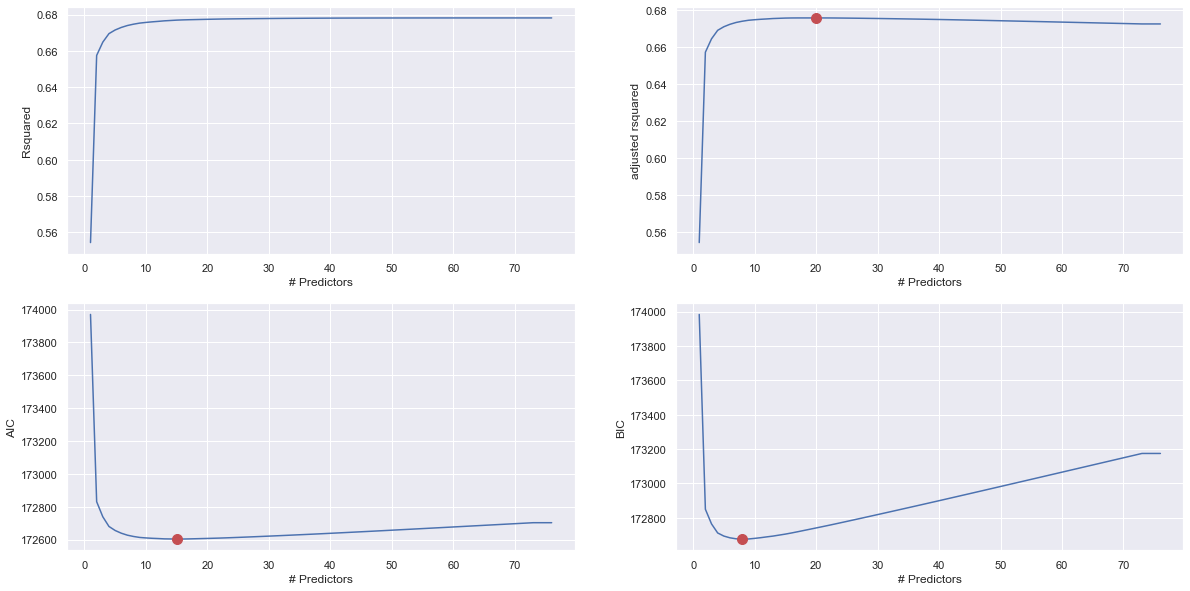

In [22]:
best_sub_plots()


In [23]:
best_fwd_reg_model1 = models_best['model'][9]
best_fwd_reg_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     999.9
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:29:16   Log-Likelihood:                -86296.
No. Observations:                4337   AIC:                         1.726e+05
Df Residuals:                    4327   BIC:                         1.727e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.072e+07   3.46e+06     -8.871      0.000   -3.75e+07   -2.39e+07
budget          2.4814      0.047     52.731      0.000       2.389       2.574
votes         377.1799     10.068     37.462      0.000     357.441     396.919
Animation    7.328e+07   7.71e+06      9.505      0.000    5.82e+07    8.84e+07
Family       4.812e+08   6.13e+07      7.846      0.000    3.61e+08    6.01e+08
R           -1.712e+07   3.48e+06     -4.915      0.000   -2.39e+07   -1.03e+07
Horror        3.76e+07   7.84e+06      4.793      0.000    2.22e+07     5.3e+07
Comedy        1.42e+07   3.77e+06      3.765      0.000    6.81e+06    2.16e+07
Germany     -3.915e+07   1.25e+07     -3.121      0.002   -6.37e+07   -1.46e+07
New_Zealand   7.27e+07    2.6e+07      2.801      0.005    2.18e+07    1.24e+08
==============================================================================
Omnibus:                     3398.856   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           250024.892
Skew:                           3.168   Prob(JB):                         0.00
Kurtosis:                      39.653   Cond. No.                     2.09e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
best_fwd_reg_model2 = models_best['model'][8]
best_fwd_reg_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     1122.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:29:30   Log-Likelihood:                -86300.
No. Observations:                4337   AIC:                         1.726e+05
Df Residuals:                    4328   BIC:                         1.727e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.065e+07   3.47e+06     -8.844      0.000   -3.74e+07   -2.39e+07
budget         2.4806      0.047     52.674      0.000       2.388       2.573
votes        380.0473     10.024     37.914      0.000     360.395     399.699
Animation   7.282e+07   7.71e+06      9.440      0.000    5.77e+07    8.79e+07
Family      4.805e+08   6.14e+07      7.829      0.000     3.6e+08    6.01e+08
R          -1.719e+07   3.49e+06     -4.932      0.000    -2.4e+07   -1.04e+07
Horror      3.737e+07   7.85e+06      4.761      0.000     2.2e+07    5.28e+07
Comedy      1.416e+07   3.78e+06      3.751      0.000    6.76e+06    2.16e+07
Germany    -3.947e+07   1.26e+07     -3.144      0.002   -6.41e+07   -1.49e+07
==============================================================================
Omnibus:                     3374.784   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           246036.408
Skew:                           3.134   Prob(JB):                         0.00
Kurtosis:                      39.362   Cond. No.                     2.09e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
#Finding the RMSE of the model selected using the forward selection procedure, where the predictors
#include 2-factor interactions
pred_gross = best_fwd_reg_model1.predict(test)
np.sqrt(((pred_gross - test.gross)**2).mean())

117156846.16279814

## BACKWARDS STEPWISE SELECTION using COUNTRYs (scroll to bottom for continents)

In [60]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [61]:
def backward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"], index = range(1,len(X.columns)))

    tic = time.time()
    predictors = X.columns
    models_best.loc[len(predictors)] = processSubset(predictors)
    
    while(len(predictors) > 1):  
        models_best.loc[len(predictors)-1] = backward(predictors)
        predictors = models_best.loc[len(predictors)-1]["model"].params.index[1:]

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [36]:
models_best = backward_selection()

Processed  76 models on 75 predictors in 21.145810842514038 seconds.
Processed  75 models on 74 predictors in 32.93132996559143 seconds.
Processed  74 models on 73 predictors in 25.15191102027893 seconds.
Processed  73 models on 72 predictors in 29.35405397415161 seconds.
Processed  72 models on 71 predictors in 56.605204820632935 seconds.
Processed  71 models on 70 predictors in 24.737207174301147 seconds.
Processed  70 models on 69 predictors in 18.838034868240356 seconds.
Processed  69 models on 68 predictors in 14.444785833358765 seconds.
Processed  68 models on 67 predictors in 14.704560041427612 seconds.
Processed  67 models on 66 predictors in 8.012302875518799 seconds.
Processed  66 models on 65 predictors in 8.126534938812256 seconds.
Processed  65 models on 64 predictors in 7.677777290344238 seconds.
Processed  64 models on 63 predictors in 8.099999904632568 seconds.
Processed  63 models on 62 predictors in 8.866546869277954 seconds.
Processed  62 models on 61 predictors in 1

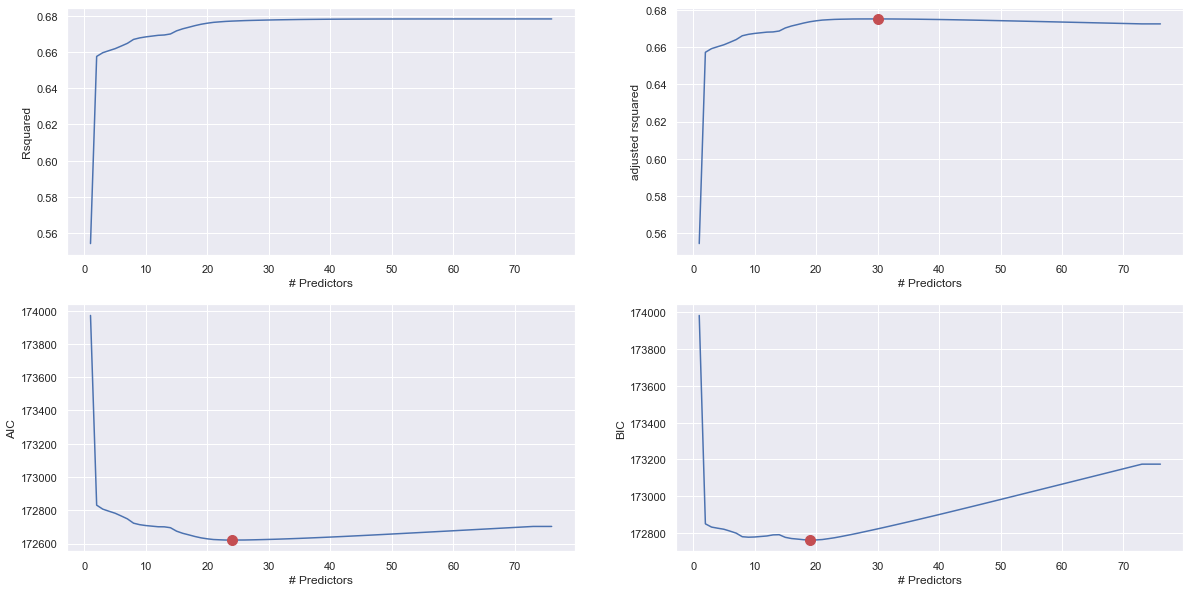

In [37]:
best_sub_plots()

In [38]:
best_bwd_reg_model3 = models_best['model'][19]
best_bwd_reg_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     472.4
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:57:17   Log-Likelihood:                -86297.
No. Observations:                4337   AIC:                         1.726e+05
Df Residuals:                    4317   BIC:                         1.728e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.275e+08   6.16e+07      6.939      0.000    3.07e+08    5.48e+08
votes        381.1975     10.065     37.872      0.000     361.464     400.931
budget         2.4898      0.050     49.774      0.000       2.392       2.588
Germany    -4.003e+07   1.26e+07     -3.185      0.001   -6.47e+07   -1.54e+07
Comedy     -4.604e+08   6.16e+07     -7.477      0.000   -5.81e+08    -3.4e+08
Action     -4.763e+08   6.16e+07     -7.735      0.000   -5.97e+08   -3.56e+08
Drama      -4.713e+08   6.17e+07     -7.644      0.000   -5.92e+08    -3.5e+08
Biography  -4.818e+08   6.19e+07     -7.788      0.000   -6.03e+08   -3.61e+08
Horror      -4.37e+08    6.2e+07     -7.047      0.000   -5.59e+08   -3.15e+08
Adventure  -4.687e+08   6.18e+07     -7.591      0.000    -5.9e+08   -3.48e+08
Crime      -4.771e+08   6.18e+07     -7.716      0.000   -5.98e+08   -3.56e+08
Animation  -4.007e+08   6.18e+07     -6.484      0.000   -5.22e+08    -2.8e+08
Fantasy    -4.553e+08   6.46e+07     -7.045      0.000   -5.82e+08   -3.29e+08
Thriller   -4.378e+08   7.53e+07     -5.816      0.000   -5.85e+08    -2.9e+08
Mystery    -4.668e+08   6.88e+07     -6.789      0.000   -6.02e+08   -3.32e+08
Sci_Fi     -5.017e+08   7.53e+07     -6.666      0.000   -6.49e+08   -3.54e+08
Romance    -4.891e+08   8.12e+07     -6.024      0.000   -6.48e+08    -3.3e+08
Western    -4.752e+08   1.23e+08     -3.873      0.000   -7.16e+08   -2.35e+08
PG_13       1.306e+07   3.93e+06      3.327      0.001    5.37e+06    2.08e+07
PG          2.152e+07   5.06e+06      4.254      0.000    1.16e+07    3.14e+07
==============================================================================
Omnibus:                     3368.475   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           247002.145
Skew:                           3.122   Prob(JB):                         0.00
Kurtosis:                      39.440   Cond. No.                     8.21e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.21e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# would say that the most important variables seem to be genre, rating, votes, budget

In [39]:
best_fwd_reg_model4 = models_best['model'][18]
best_fwd_reg_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     497.0
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:57:42   Log-Likelihood:                -86302.
No. Observations:                4337   AIC:                         1.726e+05
Df Residuals:                    4318   BIC:                         1.728e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.273e+08   6.17e+07      6.929      0.000    3.06e+08    5.48e+08
votes        381.4814     10.076     37.862      0.000     361.728     401.235
budget         2.4850      0.050     49.648      0.000       2.387       2.583
Comedy      -4.61e+08   6.16e+07     -7.480      0.000   -5.82e+08    -3.4e+08
Action     -4.767e+08   6.16e+07     -7.733      0.000   -5.98e+08   -3.56e+08
Drama      -4.722e+08   6.17e+07     -7.650      0.000   -5.93e+08   -3.51e+08
Biography  -4.829e+08   6.19e+07     -7.798      0.000   -6.04e+08   -3.61e+08
Horror     -4.369e+08   6.21e+07     -7.037      0.000   -5.59e+08   -3.15e+08
Adventure  -4.699e+08   6.18e+07     -7.602      0.000   -5.91e+08   -3.49e+08
Crime      -4.777e+08   6.19e+07     -7.717      0.000   -5.99e+08   -3.56e+08
Animation  -4.007e+08   6.19e+07     -6.477      0.000   -5.22e+08   -2.79e+08
Fantasy    -4.552e+08   6.47e+07     -7.036      0.000   -5.82e+08   -3.28e+08
Thriller   -4.379e+08   7.54e+07     -5.811      0.000   -5.86e+08    -2.9e+08
Mystery    -4.666e+08   6.88e+07     -6.779      0.000   -6.02e+08   -3.32e+08
Sci_Fi     -5.017e+08   7.53e+07     -6.659      0.000   -6.49e+08   -3.54e+08
Romance    -4.892e+08   8.13e+07     -6.019      0.000   -6.49e+08    -3.3e+08
Western    -4.754e+08   1.23e+08     -3.870      0.000   -7.16e+08   -2.35e+08
PG_13       1.349e+07   3.93e+06      3.434      0.001    5.79e+06    2.12e+07
PG          2.191e+07   5.06e+06      4.327      0.000     1.2e+07    3.18e+07
==============================================================================
Omnibus:                     3365.937   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           247647.678
Skew:                           3.117   Prob(JB):                         0.00
Kurtosis:                      39.491   Cond. No.                     8.21e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.21e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
#Finding the RMSE of the model selected using the forward selection procedure, where the predictors
#include 2-factor interactions
pred_gross = best_fwd_reg_model3.predict(test)
np.sqrt(((pred_gross - test.gross)**2).mean())

# this doesn't run cuz the test data does not have a movie of the "Sci_Fi" genre in it

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'Sci_Fi' is not defined
    gross~votes+budget+Germany+Comedy+Action+Drama+Biography+Horror+Adventure+Crime+Animation+Fantasy+Thriller+Mystery+Sci_Fi+Romance+Western+PG_13+PG
                                                                                                                       ^^^^^^

In [44]:
test.columns

Index(['name', 'year', 'released', 'score', 'votes', 'director', 'writer',
       'star', 'budget', 'gross', 'company', 'runtime', 'G', 'NC_17',
       'Not_Rated', 'PG', 'PG_13', 'R', 'TV_MA', 'Unrated', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Thriller',
       'Western', 'Argentina', 'Australia', 'Belgium', 'Brazil', 'Canada',
       'China', 'Colombia', 'Czech_Republic', 'Denmark', 'France', 'Germany',
       'Hong_Kong', 'India', 'Indonesia', 'Ireland', 'Italy', 'Japan', 'Malta',
       'Mexico', 'Netherlands', 'New_Zealand', 'Norway', 'Portugal', 'Russia',
       'South_Africa', 'South_Korea', 'Spain', 'Sweden', 'Taiwan', 'Thailand',
       'United_Kingdom', 'United_States'],
      dtype='object')

In [45]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score

## RIDGE - was not successful - disregard

In [46]:
y = train.gross

In [47]:
#Standardizing predictors so that each of them have zero mean and unit variance

# Dropping `United_States`, `Action`, and `PG_13` predictors to avoid multicollinearity
X = train.loc[:,['year','score','votes','budget','runtime','United_States', 'United_Kingdom', 'France', 'Germany', 'Belgium',
       'Spain', 'Japan', 'Australia', 'New_Zealand', 'China', 'Canada',
       'Austria', 'Norway', 'Iceland', 'West_Germany', 'Mexico',
       'Ireland', 'Italy', 'South_Korea', 'Hong_Kong', 'India',
       'United_Arab_Emirates', 'Czech_Republic', 'Finland', 'Taiwan',
       'Lebanon', 'South_Africa', 'Argentina', 'Indonesia', 'Iran',
       'Switzerland', 'Brazil', 'Republic_of_Macedonia', 'Sweden',
       'Russia', 'Netherlands', 'Aruba', 'Jamaica', 'Chile', 'Panama',
       'Denmark', 'Israel', 'Federal_Republic_of_Yugoslavia', 'Kenya',
       'Yugoslavia', 'Hungary','Comedy', 'Action', 'Drama', 'Biography', 'Horror', 'Adventure',
       'Crime', 'Animation', 'Fantasy', 'Thriller', 'Mystery', 'Sci_Fi',
       'Family', 'Romance', 'Western','PG_13', 'R', 'PG', 'Not_Rated', 'G', 'Unrated', 'X', 'NC_17',
       'Approved', 'TV_MA']]

#Defining a scaler object
scaler = StandardScaler()

#The scaler object will contain the mean and variance of each column (predictor) of X. 
#These values will be useful to scale test data based on the same mean and variance as obtained on train data
scaler.fit(X)

#Using the scaler object (or the values of mean and variance stored in it) to standardize X (or train data)
Xstd = scaler.transform(X)

In [48]:
#The tuning parameter lambda is referred as alpha in sklearn

#Creating a range of values of the tuning parameter to visualize the ridge regression coefficients
#for different values of the tuning parameter
alphas = 10**np.linspace(10,-2,200)*0.5

In [49]:
#Finding the ridge regression coefficients for increasing values of the tuning parameter
coefs = []
for a in alphas:        
    ridge = Ridge(alpha = a)
    ridge.fit(Xstd, y)
    coefs.append(ridge.coef_)

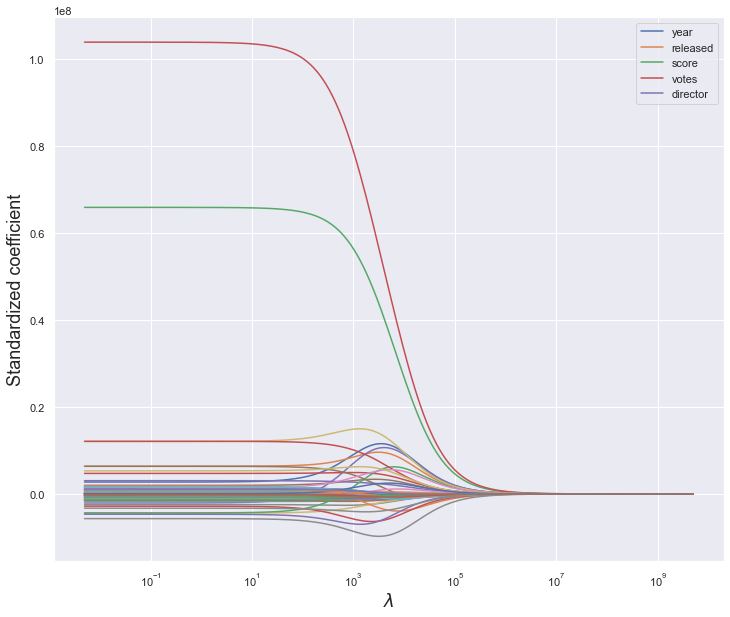

In [50]:
#Visualizing the shrinkage in ridge regression coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(train.columns[1:6]);

In [51]:
#Let us use cross validation to find the optimal value of the tuning parameter - lambda
#For the optimal lambda, the cross validation error will be the least

#Note that we are reducing the range of alpha so as to better visualize the minimum
alphas = 10**np.linspace(1.5,-3,200)*0.5
ridgecv = RidgeCV(alphas = alphas,store_cv_values=True)
ridgecv.fit(Xstd, y)

#Optimal value of the tuning parameter - lamda
ridgecv.alpha_

/Users/aarti.pappu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)


15.811388300841896

Text(0, 0.5, 'Cross-validation error')

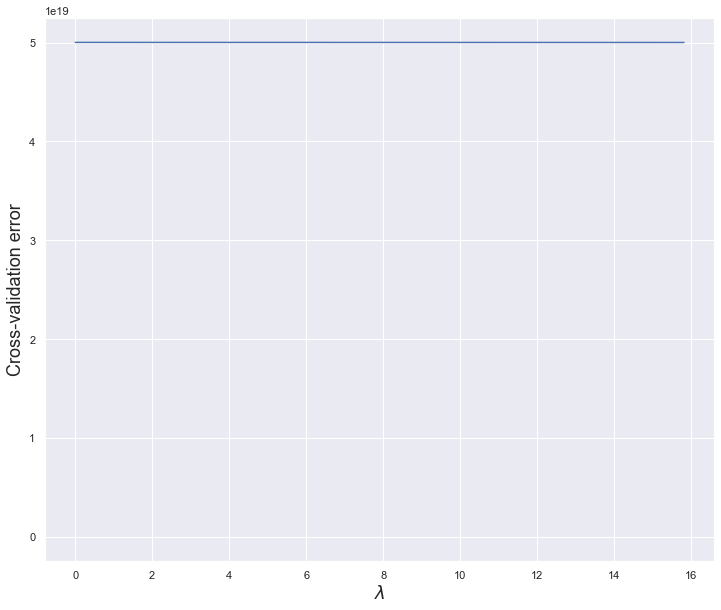

In [52]:
#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(ridgecv.alphas,ridgecv.cv_values_.sum(axis=0))
plt.plot([ridgecv.alpha_,ridgecv.alpha_],[40,40.2],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

## LASSO - was not successful - disregard

In [54]:
#Creating a range of values of the tuning parameter to visualize the lasso coefficients
#for different values of the tuning parameter
alphas = 10**np.linspace(10,-2,100)*0.1

In [55]:
#Finding the lasso coefficients for increasing values of the tuning parameter
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xstd, y)
    coefs.append(lasso.coef_)

/Users/aarti.pappu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.111e+17, tolerance: 1.500e+16
  model = cd_fast.enet_coordinate_descent(
/Users/aarti.pappu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.110e+17, tolerance: 1.500e+16
  model = cd_fast.enet_coordinate_descent(
/Users/aarti.pappu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

KeyboardInterrupt: 

In [ ]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(train.columns[1:6]);
#plt.plot([lassocv.alpha_,lassocv.alpha_],[-0.4,0.25],':')
plt.legend(train.columns[1:6]);

In [ ]:
#Let us use cross validation to find the optimal value of the tuning parameter - lambda
#For the optimal lambda, the cross validation error will be the least

#Note that we are reducing the range of alpha so as to better visualize the minimum
alphas = 10**np.linspace(-1,-5,200)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(Xstd, y)

#Optimal value of the tuning parameter - lamda
lassocv.alpha_

In [ ]:
#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(lassocv.alphas_,lassocv.mse_path_.mean(axis=1))
plt.plot([lassocv.alpha_,lassocv.alpha_],[0.145,0.151],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

## FORWARD STEPWISE USING CONTINENTS

In [24]:
def dummies_for_continents(df):
    rating_dummy = pd.get_dummies(df['rating'])
    df = pd.concat([df, rating_dummy], axis=1)
    df = df.drop('rating', axis=1)
    genre_dummy = pd.get_dummies(df['genre'])
    df = pd.concat([df, genre_dummy], axis=1)
    df = df.drop('genre', axis=1)
    continent_dummy = pd.get_dummies(df['continent'])
    df = pd.concat([df, continent_dummy], axis=1)
    df = df.drop('continent', axis=1)
    return df

train = dummies_for_continents(train)
test = dummies_for_continents(test)

In [25]:
#Creating a set of predictors from which we need to find the best subset of predictors
X = train[['year','score','votes','budget','runtime','North_America', 'Europe', 'Asia', 'Oceania', 'Africa',
       'South_America','Comedy', 'Action', 'Drama', 'Biography', 'Horror', 'Adventure',
       'Crime', 'Animation', 'Fantasy', 'Thriller', 'Mystery', 'Sci_Fi',
       'Family', 'Romance', 'Western','PG_13', 'R', 'PG', 'Not_Rated', 'G', 'Unrated', 'X', 'NC_17',
       'Approved', 'TV_MA']]

In [59]:
models_best = forward_selection()

Processed  36 models on 1 predictors in 0.2952718734741211 seconds.
Processed  35 models on 2 predictors in 0.26404619216918945 seconds.
Processed  34 models on 3 predictors in 0.31867003440856934 seconds.
Processed  33 models on 4 predictors in 0.35049891471862793 seconds.
Processed  32 models on 5 predictors in 0.3686378002166748 seconds.
Processed  31 models on 6 predictors in 0.45598387718200684 seconds.
Processed  30 models on 7 predictors in 0.42125368118286133 seconds.
Processed  29 models on 8 predictors in 1.0424277782440186 seconds.
Processed  28 models on 9 predictors in 0.7187321186065674 seconds.
Processed  27 models on 10 predictors in 0.6908159255981445 seconds.
Processed  26 models on 11 predictors in 0.7389049530029297 seconds.
Processed  25 models on 12 predictors in 0.5834012031555176 seconds.
Processed  24 models on 13 predictors in 0.8132009506225586 seconds.
Processed  23 models on 14 predictors in 0.7304379940032959 seconds.
Processed  22 models on 15 predictors 

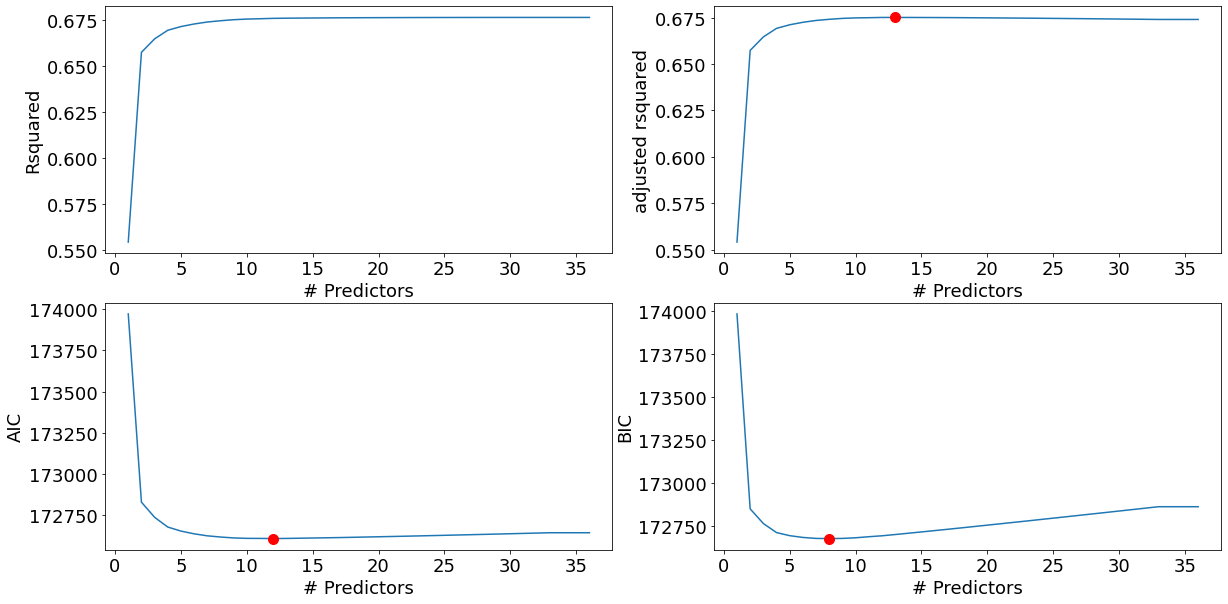

In [62]:
best_sub_plots()

In [64]:
best_fwd_reg_model5 = models_best['model'][8]
best_fwd_reg_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     1122.
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:09:09   Log-Likelihood:                -86301.
No. Observations:                4337   AIC:                         1.726e+05
Df Residuals:                    4328   BIC:                         1.727e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.848e+07   3.57e+06     -7.975      0.000   -3.55e+07   -2.15e+07
budget         2.4691      0.047     52.358      0.000       2.377       2.562
votes        380.2907     10.024     37.937      0.000     360.638     399.943
Animation   7.303e+07   7.71e+06      9.468      0.000    5.79e+07    8.82e+07
Family      4.789e+08   6.14e+07      7.803      0.000    3.59e+08    5.99e+08
R          -1.751e+07   3.48e+06     -5.028      0.000   -2.43e+07   -1.07e+07
Horror      3.676e+07   7.86e+06      4.677      0.000    2.13e+07    5.22e+07
Comedy      1.327e+07   3.79e+06      3.504      0.000    5.85e+06    2.07e+07
Europe     -1.399e+07    4.6e+06     -3.041      0.002    -2.3e+07   -4.97e+06
==============================================================================
Omnibus:                     3383.478   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           248520.301
Skew:                           3.145   Prob(JB):                         0.00
Kurtosis:                      39.547   Cond. No.                     2.09e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## BACKWARD STEPWISE USING CONTINENTS

In [65]:
models_best = backward_selection()

Processed  36 models on 35 predictors in 2.197654962539673 seconds.
Processed  35 models on 34 predictors in 2.4277868270874023 seconds.
Processed  34 models on 33 predictors in 2.9556779861450195 seconds.
Processed  33 models on 32 predictors in 2.190606117248535 seconds.
Processed  32 models on 31 predictors in 2.2066121101379395 seconds.
Processed  31 models on 30 predictors in 1.9492809772491455 seconds.
Processed  30 models on 29 predictors in 1.6933581829071045 seconds.
Processed  29 models on 28 predictors in 1.7139551639556885 seconds.
Processed  28 models on 27 predictors in 1.3548190593719482 seconds.
Processed  27 models on 26 predictors in 1.762209177017212 seconds.
Processed  26 models on 25 predictors in 1.4984359741210938 seconds.
Processed  25 models on 24 predictors in 1.1918909549713135 seconds.
Processed  24 models on 23 predictors in 1.6887140274047852 seconds.
Processed  23 models on 22 predictors in 0.9095802307128906 seconds.
Processed  22 models on 21 predictors

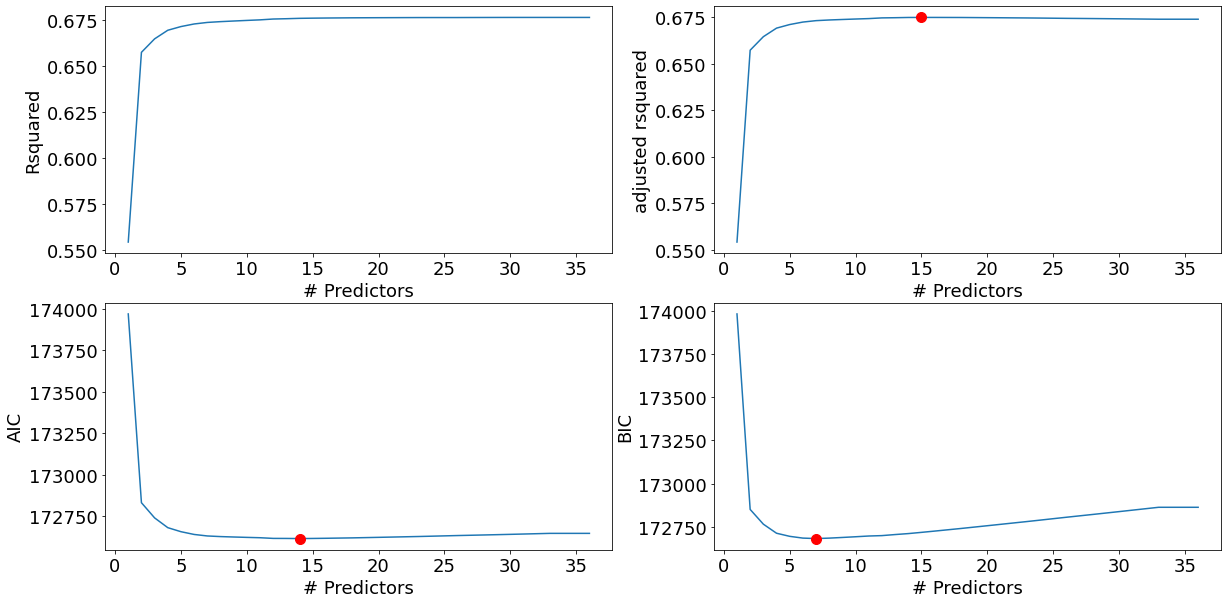

In [66]:
best_sub_plots()

In [67]:
best_bwd_reg_model6 = models_best['model'][7]
best_bwd_reg_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1277.
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:10:20   Log-Likelihood:                -86307.
No. Observations:                4337   AIC:                         1.726e+05
Df Residuals:                    4329   BIC:                         1.727e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.218e+07   3.09e+06     -7.179      0.000   -2.82e+07   -1.61e+07
votes        378.0116     10.016     37.740      0.000     358.375     397.649
budget         2.4416      0.047     52.439      0.000       2.350       2.533
Europe     -1.528e+07   4.59e+06     -3.330      0.001   -2.43e+07   -6.28e+06
Horror      3.233e+07   7.77e+06      4.163      0.000    1.71e+07    4.76e+07
Animation   6.938e+07   7.65e+06      9.066      0.000    5.44e+07    8.44e+07
Family      4.749e+08   6.14e+07      7.728      0.000    3.54e+08    5.95e+08
R          -1.908e+07   3.46e+06     -5.515      0.000   -2.59e+07   -1.23e+07
==============================================================================
Omnibus:                     3388.864   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           249227.482
Skew:                           3.152   Prob(JB):                         0.00
Kurtosis:                      39.598   Cond. No.                     2.09e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
best_bwd_reg_model7 = models_best['model'][8]
best_bwd_reg_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     1119.
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:10:40   Log-Likelihood:                -86304.
No. Observations:                4337   AIC:                         1.726e+05
Df Residuals:                    4328   BIC:                         1.727e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -5.15e+07   1.26e+07     -4.089      0.000   -7.62e+07   -2.68e+07
score       4.827e+06   2.01e+06      2.401      0.016    8.85e+05    8.77e+06
votes        363.9849     11.591     31.403      0.000     341.261     386.709
budget         2.4616      0.047     52.069      0.000       2.369       2.554
Europe     -1.653e+07   4.62e+06     -3.581      0.000   -2.56e+07   -7.48e+06
Horror      3.527e+07   7.86e+06      4.488      0.000    1.99e+07    5.07e+07
Animation   6.722e+07    7.7e+06      8.729      0.000    5.21e+07    8.23e+07
Family      4.727e+08   6.14e+07      7.696      0.000    3.52e+08    5.93e+08
R          -2.011e+07   3.48e+06     -5.773      0.000   -2.69e+07   -1.33e+07
==============================================================================
Omnibus:                     3391.207   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           246026.270
Skew:                           3.161   Prob(JB):                         0.00
Kurtosis:                      39.352   Cond. No.                     2.09e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""